In [1]:
#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library

import json
from datetime import datetime
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
import plotly.graph_objs as go # it's like "plt" of matplot
import plotly.express as px
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc #To evaluate our model
from sklearn.preprocessing import LabelEncoder
import pandas as pd


Online retailer, eBay is providing an option of bidding to their customers globally. Bidding is employed to find the real price of items in the market based on the demand. The price offered by anyone participating in this process is termed as a 'bid'. Normal bids are classified as ‘0’ bids in the data set and anomalous bids as ‘1’. The goal is to use classification or clustering algorithms to predict the bids in the future.

**Data Dictionary**
* **Record ID**: Unique identifier of a record in the dataset.
* **Auction ID**: Unique identifier of an auction.
* **Bidder ID**: Unique identifier of a bidder.
* **Bidder Tendency**: A shill bidder participates exclusively in auctions of few sellers rather than a diversified lot. This is a collusive act involving the fraudulent seller and an accomplice.
* **Bidding Ratio**: A shill bidder participates more frequently to raise the auction price and attract higher bids from legitimate participants.
* **Successive Outbidding**: A shill bidder successively outbids himself even though he is the current winner to increase the price gradually with small consecutive increments.
* **Last Bidding**: A shill bidder becomes inactive at the last stage of the auction (more than 90\% of the auction duration) to avoid winning the auction.
* **Auction Bids**: Auctions with SB activities tend to have a much higher number of bids than the average of bids in concurrent auctions.
* **Auction Starting Price**: a shill bidder usually offers a small starting price to attract legitimate bidders into the auction.
* **Early Bidding**: A shill bidder tends to bid pretty early in the auction (less than 25\% of the auction duration) to get the attention of auction users.
* **Winning Ratio**: A shill bidder competes in many auctions but hardly wins any auctions.
* **Auction Duration**: How long an auction lasted.
* **Class**: 0 for normal behaviour bidding; 1 for otherwise.

For purpose of this project we are going to use established model for data mining - **CRISP-DM** (the cross-industry standard process for data mining). CRISP-DM project consists of 6 stages. Following one another, it helps in keeping sequence of project's steps. The defined stages of CRISP-DM are:
* Business Understanding;
* Data understanding;
* Data Preparation;
* Modeling;
* Pruning the Decsion Tree;

### 1. Business understanding

The purpose of the Business Understanding phase is to understand what the business wants to solve. On this stage we set questions we need to answer with the project's outcome. Following the assigment task we can define the next questions within the project:
* What features are the most important for bidding class prediction?
* Can a target variable be predicted with an accuracy higher than 90%?

### 2. Data Understanding

The data understanding phase goes hand in hand with the business understanding phase and encourages the focus to ascertain, assemble, and scrutinize the data sets that can help us to achieve the project goals.

My first step will be uploading the dataset. Also, I want to set **Record_ID** as an index column. The reason for that is that the **Record_ID** column contains a unique identification number which can facilitate data retrieval and handling data in general.

In [2]:
#loading the data into pandas
url = "https://raw.githubusercontent.com/StephenJudeD/eBay-Shill-Bidding-Data-Machine-Learning-Visualization-/main/Ebay_ShillBiddingDataset.csv"
#df = pd.read_csv(url,index_col=7)
df_shill = pd.read_csv(url)

print(df_shill.head(5))

   Record_ID  Auction_ID Bidder_ID  Bidder_Tendency  Bidding_Ratio  \
0          1         732     _***i         0.200000       0.400000   
1          2         732     g***r         0.024390       0.200000   
2          3         732     t***p         0.142857       0.200000   
3          4         732     7***n         0.100000       0.200000   
4          5         900     z***z         0.051282       0.222222   

   Successive_Outbidding  Last_Bidding  Auction_Bids  Starting_Price_Average  \
0                    0.0      0.000028           0.0                0.993593   
1                    0.0      0.013123           0.0                0.993593   
2                    0.0      0.003042           0.0                0.993593   
3                    0.0      0.097477           0.0                0.993593   
4                    0.0      0.001318           0.0                0.000000   

   Early_Bidding  Winning_Ratio  Auction_Duration  Class  
0       0.000028       0.666667        

In [3]:
df_shill.head()

Record_ID  Auction_ID Bidder_ID  Bidder_Tendency  Bidding_Ratio  \
0          1         732     _***i         0.200000       0.400000   
1          2         732     g***r         0.024390       0.200000   
2          3         732     t***p         0.142857       0.200000   
3          4         732     7***n         0.100000       0.200000   
4          5         900     z***z         0.051282       0.222222   

   Successive_Outbidding  Last_Bidding  Auction_Bids  Starting_Price_Average  \
0                    0.0      0.000028           0.0                0.993593   
1                    0.0      0.013123           0.0                0.993593   
2                    0.0      0.003042           0.0                0.993593   
3                    0.0      0.097477           0.0                0.993593   
4                    0.0      0.001318           0.0                0.000000   

   Early_Bidding  Winning_Ratio  Auction_Duration  Class  
0       0.000028       0.666667                 5      0  
1       0.013123       0.944444                 5      0  
2       0.003042       1.000000                 5      0  
3       0.097477       1.000000                 5      0  
4       0.001242       0.500000                 7      0

In [4]:
# apply the dtype attribute
result = df_shill.dtypes

print("Output:")
print(result)

Output:
Record_ID                   int64
Auction_ID                  int64
Bidder_ID                  object
Bidder_Tendency           float64
Bidding_Ratio             float64
Successive_Outbidding     float64
Last_Bidding              float64
Auction_Bids              float64
Starting_Price_Average    float64
Early_Bidding             float64
Winning_Ratio             float64
Auction_Duration            int64
Class                       int64
dtype: object


In [5]:
#import sys
#!{sys.executable} -m pip install pandas-profiling

In [5]:
from pandas_profiling import ProfileReport

In [6]:
profile = ProfileReport(df_shill, title="Data Profile Report")
json_data = profile.to_json()
json_data = json.loads(json_data)
print("Data Profile Report")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Render JSON:   0%|          | 0/1 [00:00<?, ?it/s]

Data Profile Report


In [7]:
profile

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

From the table above we can observe, that values range from 0 to 1 for each feature except **Auction_Duration** and **Auction_ID**. **Last_Bidding** and **Auction_Duration** seem to follow a normal distribution. Also, I can infer that **Winning_Ratio** and **Successive_Outbidding** have lots of observations cluster around either **0** or **1** values. And the dependent variable **Class** is more represented by **0** class than **1** as mean equals 0.1. It means that the data is imbalanced and we will have to decide how to deal with it in the next chapter. 
Let's see how many observations we have represented for each class.

In [9]:
# Remvoing variable columns
df_shill = df_shill[['Bidder_Tendency',
       'Bidding_Ratio', 'Successive_Outbidding', 'Last_Bidding',
       'Auction_Bids', 'Starting_Price_Average', 'Early_Bidding',
       'Winning_Ratio', 'Auction_Duration', 'Class']]
df_shill.head()

Bidder_Tendency  Bidding_Ratio  Successive_Outbidding  Last_Bidding  \
0         0.200000       0.400000                    0.0      0.000028   
1         0.024390       0.200000                    0.0      0.013123   
2         0.142857       0.200000                    0.0      0.003042   
3         0.100000       0.200000                    0.0      0.097477   
4         0.051282       0.222222                    0.0      0.001318   

   Auction_Bids  Starting_Price_Average  Early_Bidding  Winning_Ratio  \
0           0.0                0.993593       0.000028       0.666667   
1           0.0                0.993593       0.013123       0.944444   
2           0.0                0.993593       0.003042       1.000000   
3           0.0                0.993593       0.097477       1.000000   
4           0.0                0.000000       0.001242       0.500000   

   Auction_Duration  Class  
0                 5      0  
1                 5      0  
2                 5      0  
3                 5      0  
4                 7      0

As we are dealing with a classification problem we don't need to identify correlation between variables.

I also want to take a look at boxplots for each variable to get a better understanding of distribution and outliers.

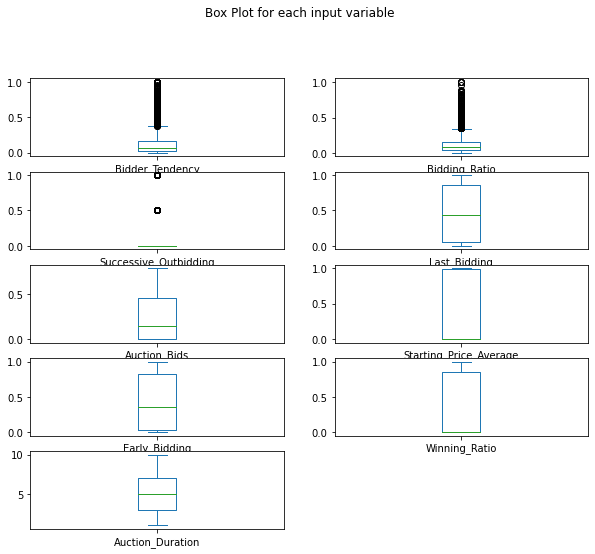

In [10]:
df_shill.drop('Class', axis=1).plot(kind='box', subplots=True, layout=(6,2), sharex=False, sharey=False, figsize=(10,10), title='Box Plot for each input variable')
plt.show()

**Bidder_Tendency** and **Bidding_Ratio** have many outliers. We will discuss in the next chapter if we need to remove them. **Auction_ID**, **Last_Bidding**, **Early_Bidding** and **Auction_Duration** seem to follow normal distribution. We infered earlier that **Winning_Ratio** and **Starting_Price_Average** have values mostly clustered around **0** and **1**. **Successive_Outbidding** boxplot looks interesting, as it shows that we migh have outliers. I am going to plot density graphs for these 3 features to get a better visual comprehension.

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


Text(0, 0.5, 'Probability Density')

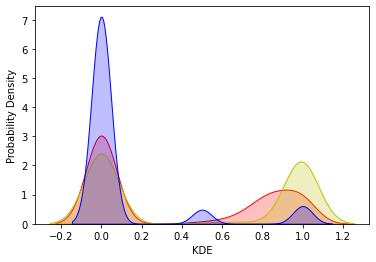

In [11]:
print(sns.kdeplot(data=df_shill, x='Winning_Ratio', color='r', shade=True))
print(sns.kdeplot(data=df_shill, x='Starting_Price_Average', color='y', shade=True))
print(sns.kdeplot(data=df_shill, x='Successive_Outbidding', color='b', shade=True))

plt.xlabel('KDE')
plt.ylabel('Probability Density')

With the graph we can confirm the statement we made above. As for **Successive_Outbidding** variable, it's not ouliers but data is represented by only 3 values **0**, **0.5** and **1**. As number of **0** values are drastically higher than **0.5** and **1** it shows the values as outliers.

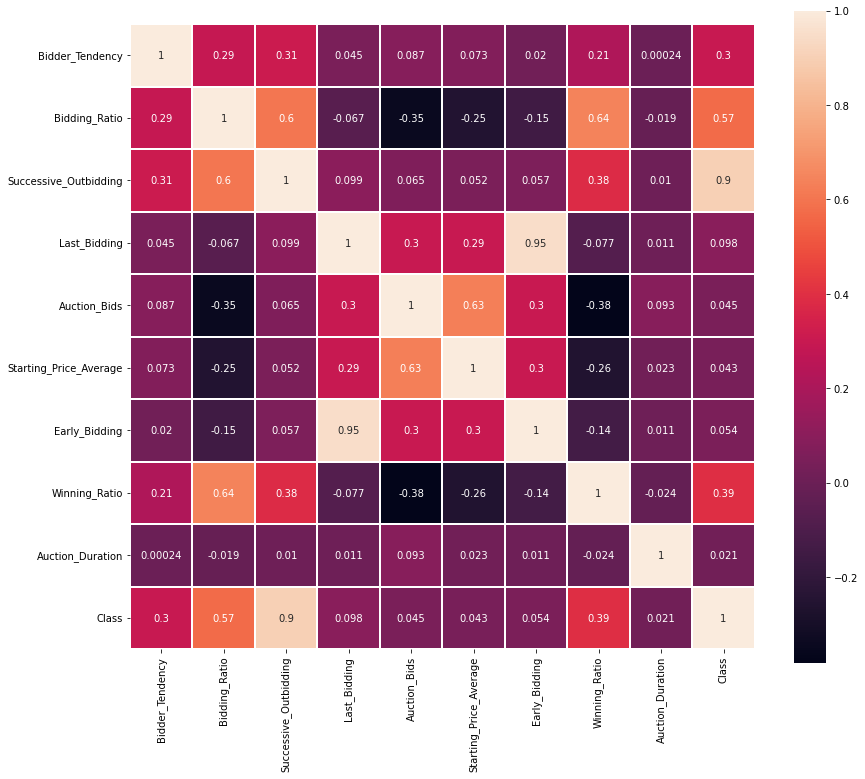

In [12]:
# creating a corr plot to help understand relationships
plt.figure(figsize=(14,12))
corr_plot = sns.heatmap(df_shill.corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

### 3. Data Preparation

I'll start the Data Preparation section with normalization. Normalization typically means rescaling the values into a range of [0,1]. (Geller, 2019)
When we have all features normalized within one range it will help ML models run faster and with the better accuracy.
The reason why I'll be using normalization is that most of the features are already ranged between 0 and 1 except **Auction_ID** and **Auction_Duration**, therefore I will scale only these two features.

In [13]:
# Importing train-test-split 
from sklearn.model_selection import train_test_split

In [14]:
# Putting feature variable to X
X = df_shill.drop('Class',axis=1)

# Putting response variable to y
y = df_shill['Class']

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
cls = DecisionTreeClassifier()
cls.fit(X, y)

DecisionTreeClassifier()

In [17]:
importances = cls.feature_importances_
columns = X.columns
columns

Index(['Bidder_Tendency', 'Bidding_Ratio', 'Successive_Outbidding',
       'Last_Bidding', 'Auction_Bids', 'Starting_Price_Average',
       'Early_Bidding', 'Winning_Ratio', 'Auction_Duration'],
      dtype='object')

Text(0, 0.5, 'Percentage of importances')

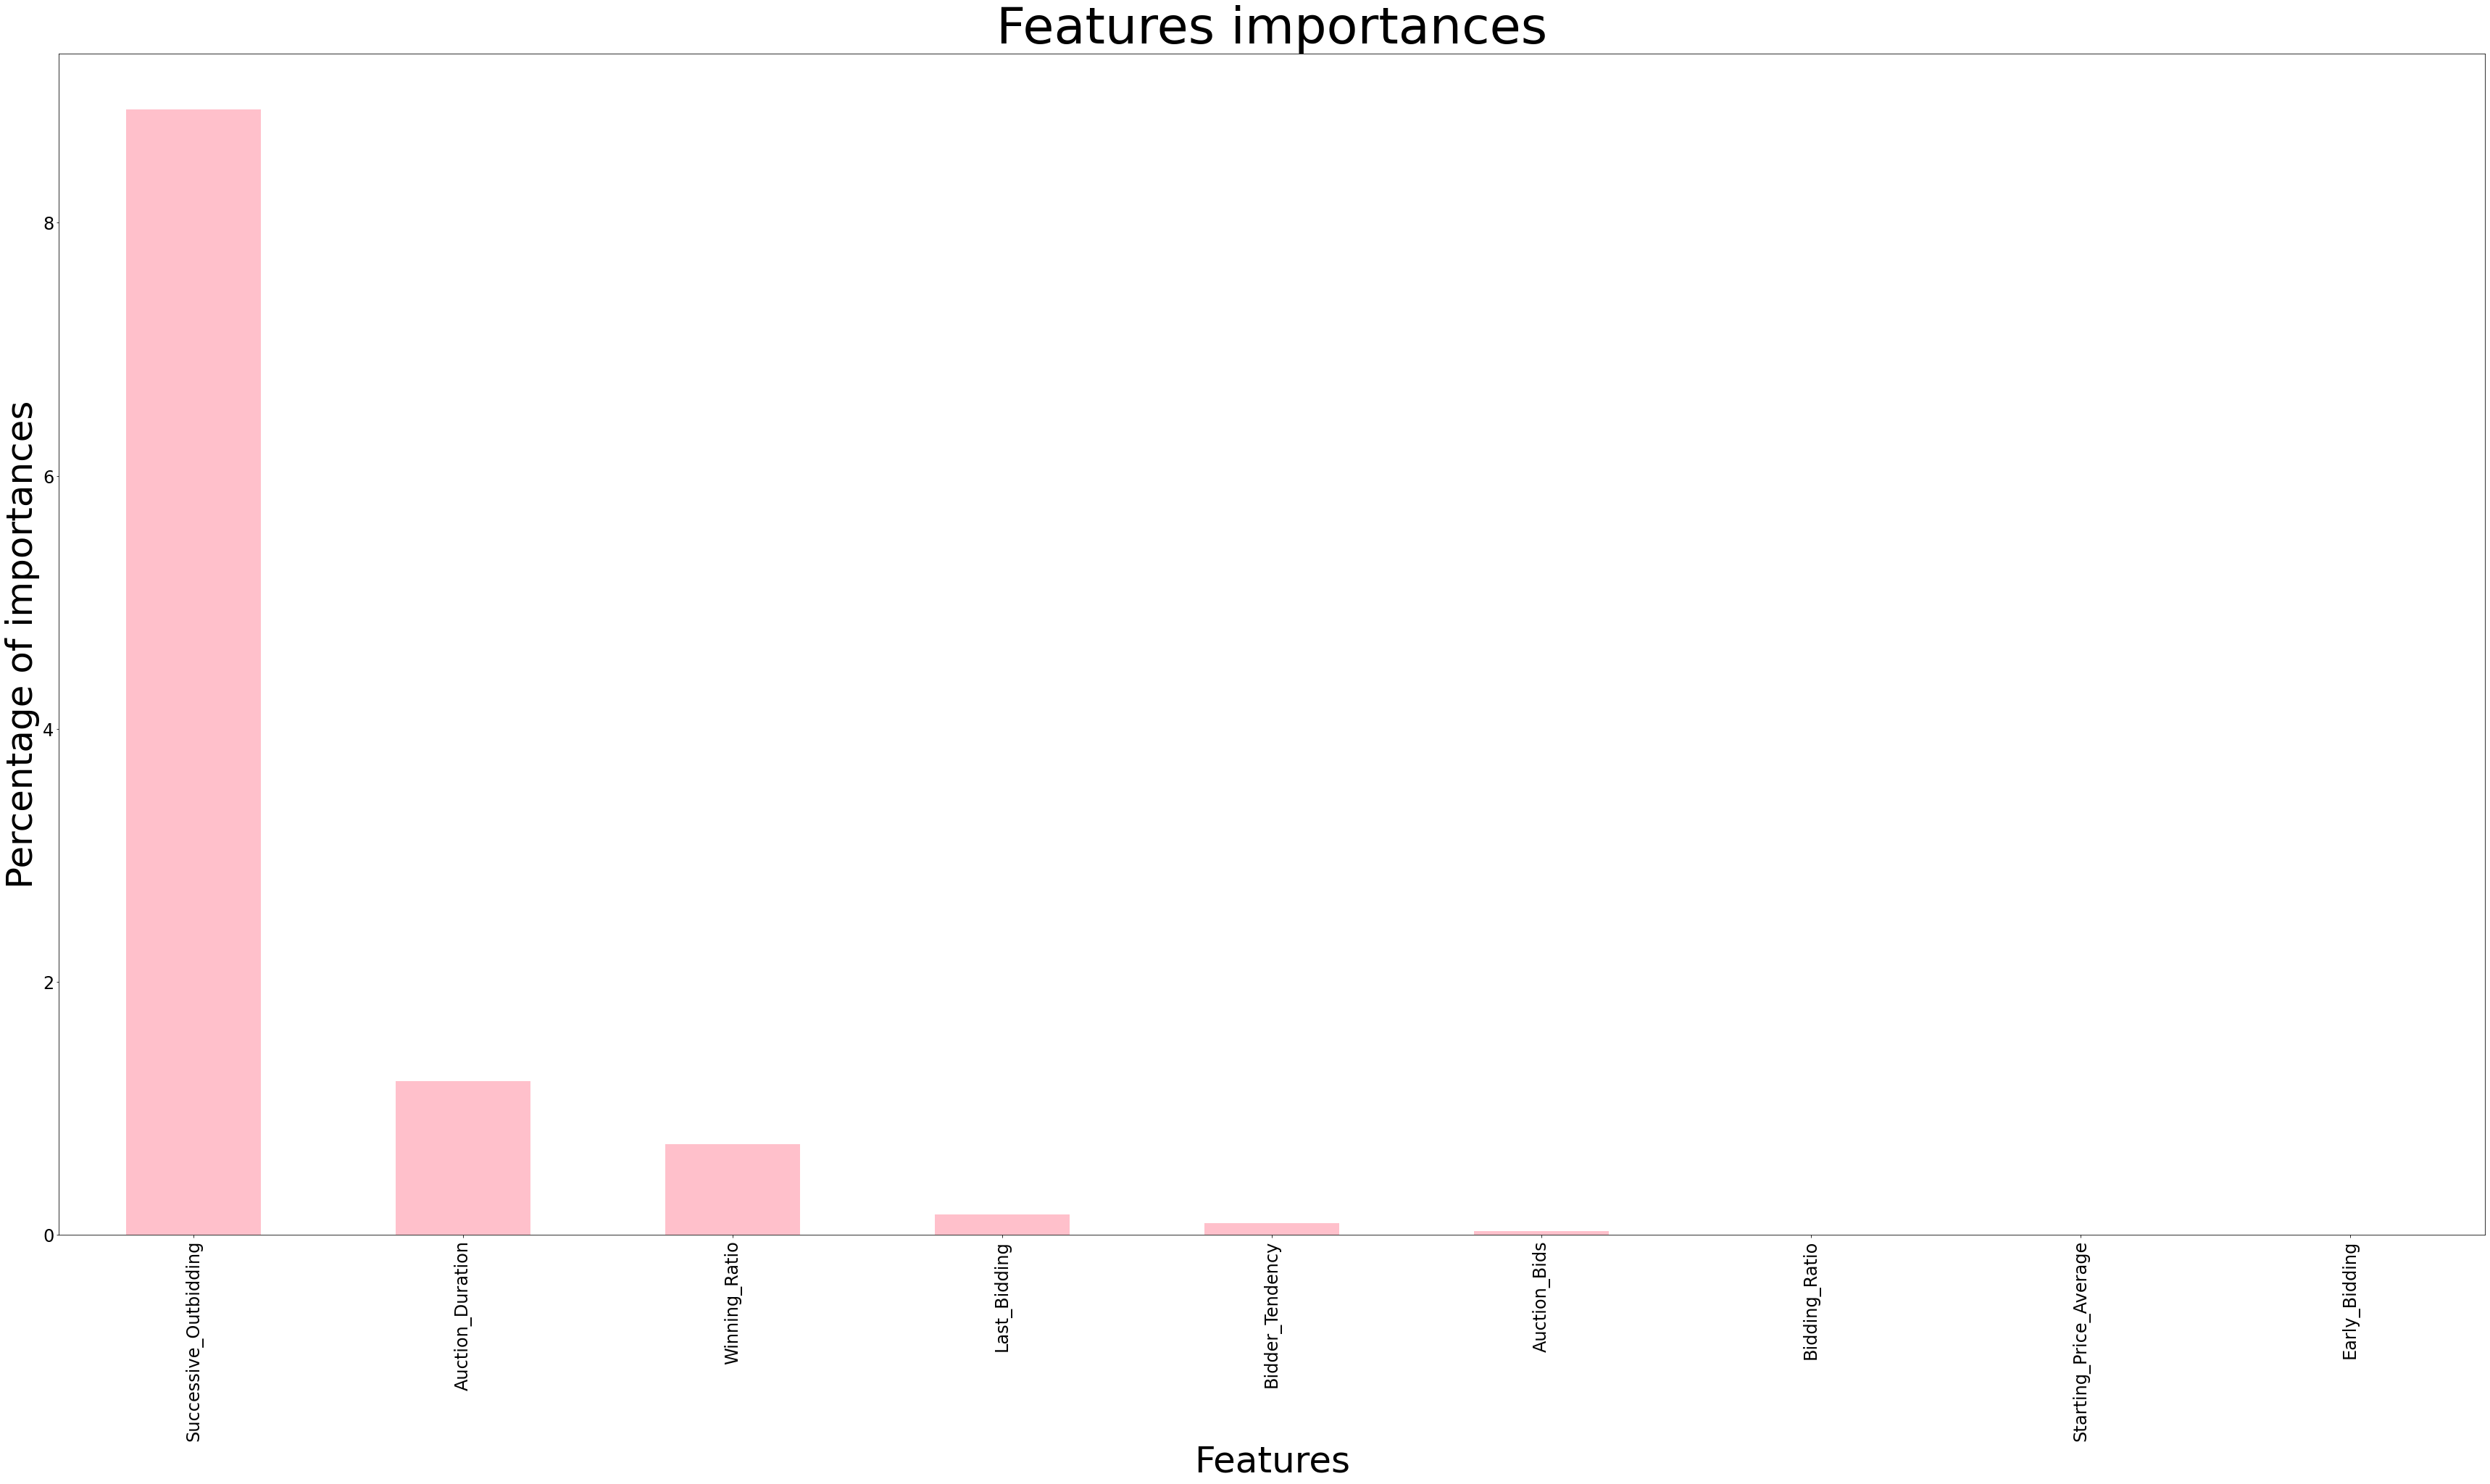

In [18]:
df_import = pd.DataFrame(importances, columns = ['Feature importances'], index=columns)
df_import['Percentage'] = pd.DataFrame((df_import.sort_values(by= ['Feature importances'], ascending=False)/df_import.shape[0])*100)
pd.options.display.float_format = "{:.2f}".format 
df_import=df_import.sort_values(by= ['Percentage'], ascending=False)

# plotting features importances
g = df_import['Percentage'].plot(kind = 'bar', figsize=(60,30), fontsize=24, color = 'pink')
g.set_title('Features importances', fontsize=70)
g.set_xlabel('Features', fontsize=50)
g.set_ylabel('Percentage of importances', fontsize=50)

In [19]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state = 99)
X_train.head()

Bidder_Tendency  Bidding_Ratio  Successive_Outbidding  Last_Bidding  \
134              0.25           0.08                   0.00          0.00   
2517             0.06           0.25                   0.00          0.26   
1757             0.03           0.06                   0.00          0.88   
1423             0.04           0.04                   0.00          0.00   
5670             1.00           0.59                   1.00          0.20   

      Auction_Bids  Starting_Price_Average  Early_Bidding  Winning_Ratio  \
134           0.00                    0.00           0.00           0.00   
2517          0.00                    0.00           0.16           0.87   
1757          0.71                    0.99           0.73           0.00   
1423          0.25                    0.00           0.00           0.00   
5670          0.00                    0.00           0.03           1.00   

      Auction_Duration  
134                  1  
2517                 3  
1757                 7  
1423                 3  
5670                 7

### 4. Modeling

Decision Tree is a Supervised Machine Learning Algorithm that uses a set of rules to make decisions. The intuition behind Decision Trees is that we use the dataset features to create yes/no questions and continually split the dataset until we isolate all data points belonging to each class. Every time we ask a question we add a node to the tree. The result of asking a question splits the dataset based on the value of a feature, and creates new nodes. The algorithm tries to completely separate the dataset such that all leaf nodes, i.e., the nodes that don’t split the data further, belong to a single class. These are called pure leaf nodes. In the end, the algorithm can only assign one class to the data points in each leaf node.

Similarly to the previous chapter we want to define the best parameters in order to reach the best accuracy. For this model I'll be chechking the next parameters:
* **Max_depth**;
* **Min_samples_leaf**.

**Max_depth** - The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**Min_samples_leaf** - The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. 

In [20]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = cls.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1696
           1       1.00      1.00      1.00       201

    accuracy                           1.00      1897
   macro avg       1.00      1.00      1.00      1897
weighted avg       1.00      1.00      1.00      1897



In [21]:
#Plotting the Decision Tree - We need the graphviz library to plot a tree
X_train.shape, X_test.shape

((4424, 9), (1897, 9))

In [22]:
feature_cols = ['Bidder_Tendency',
       'Bidding_Ratio', 'Successive_Outbidding', 'Last_Bidding',
       'Auction_Bids', 'Starting_Price_Average', 'Early_Bidding',
       'Winning_Ratio', 'Auction_Duration']
X = df_shill[feature_cols] # Features
y = df_shill.Class # Target variable

In [23]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [24]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.9989457037427517


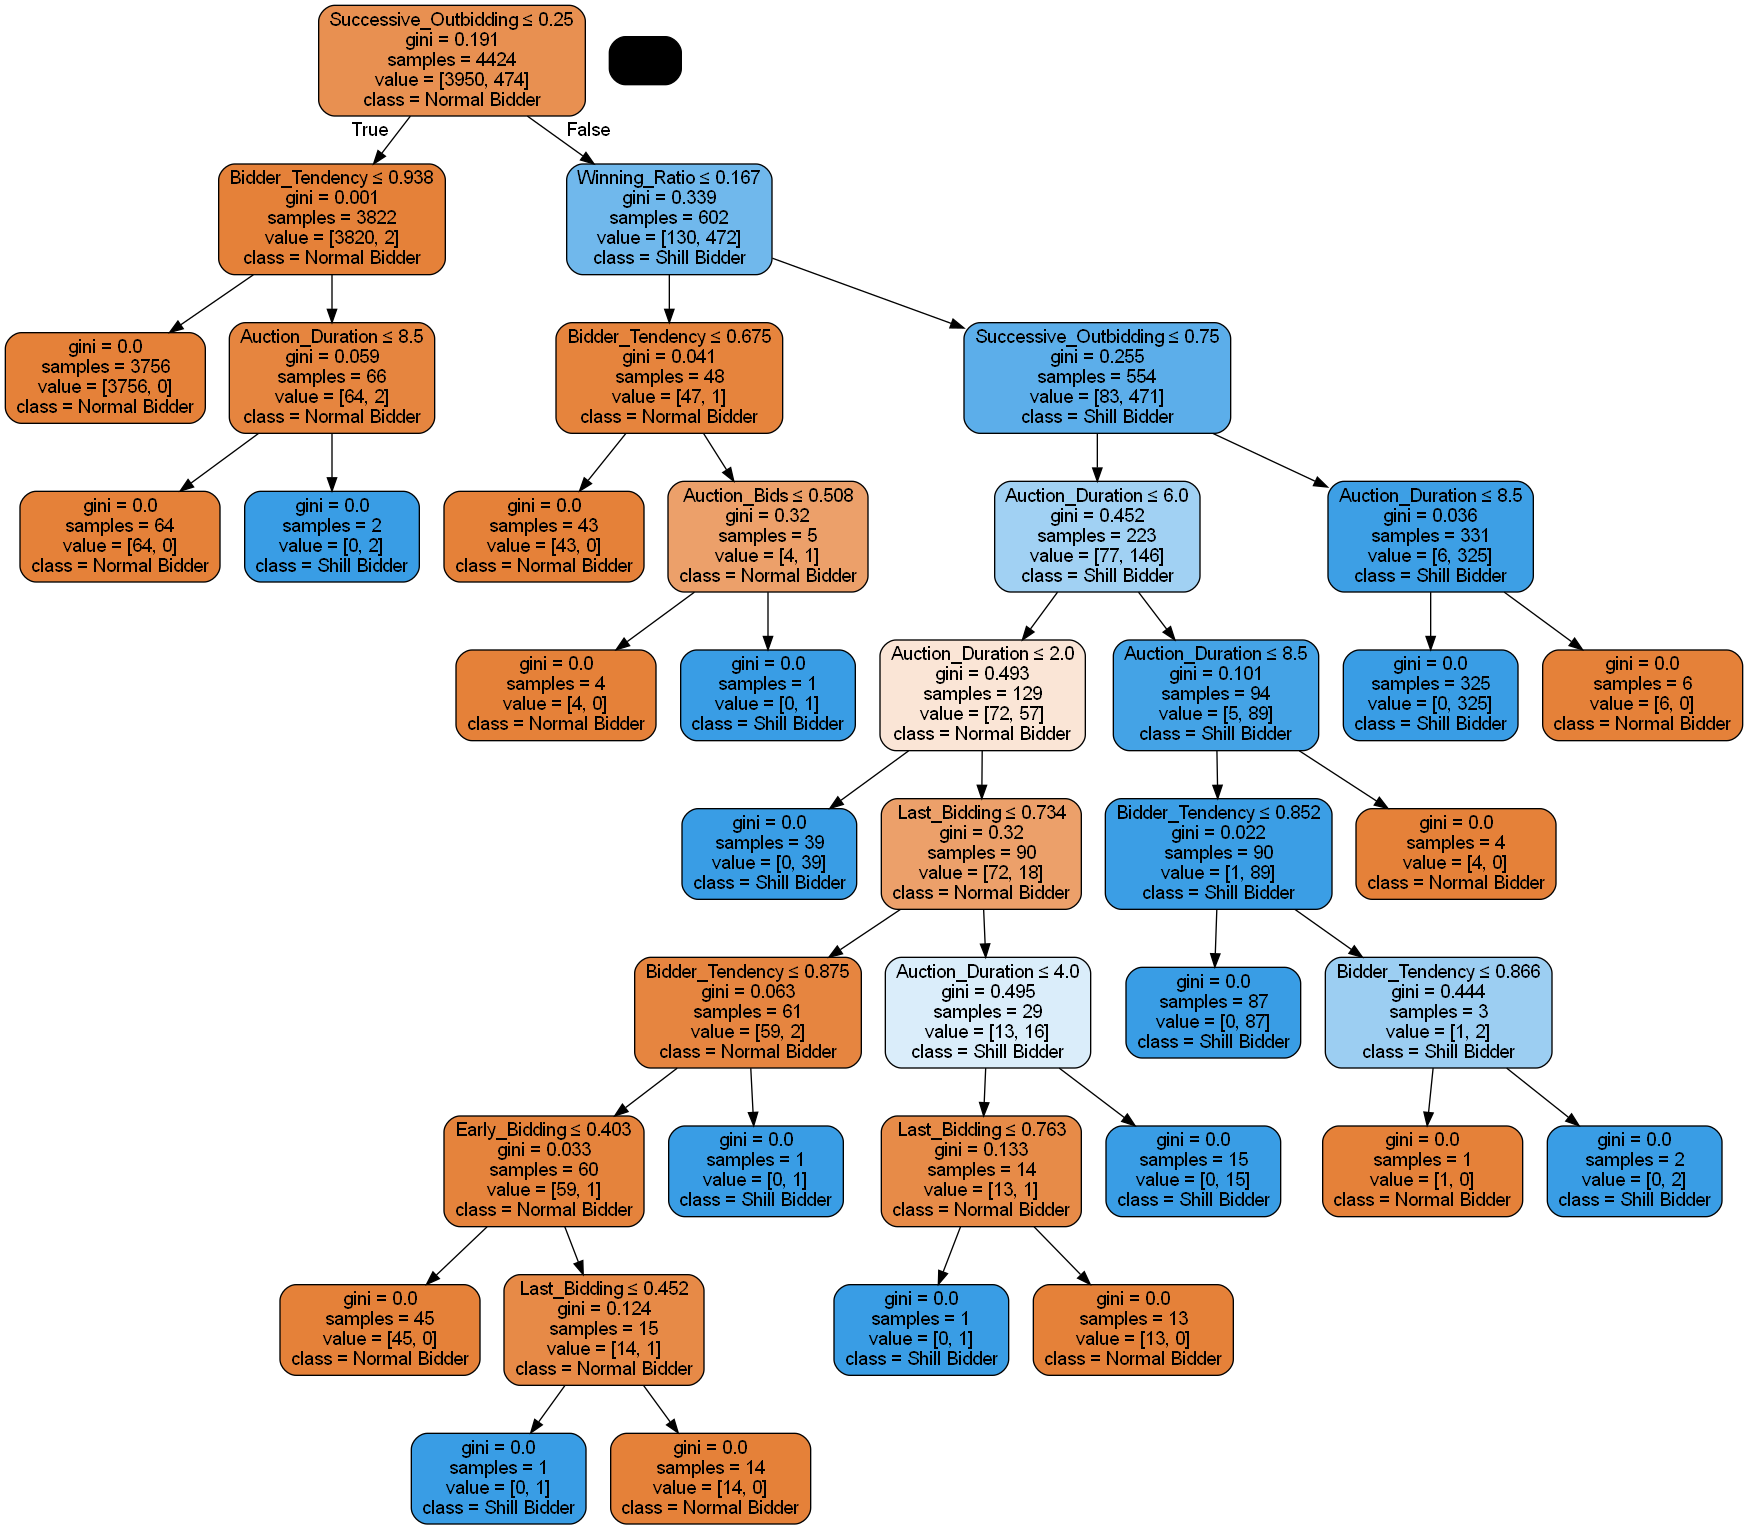

In [25]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['Normal Bidder', 'Shill Bidder'])


graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('shill.png')
Image(graph.create_png())

**5. Pruning the Decsion Tree**

**Grid Search to Find Optimal Hyperparameters**

I will now use GridSearchCV to find multiple optimal hyperparameters together, scikit-Learn’s GridSearchCV will do the heavy lifting

In [26]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 7

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 7 folds for each of 16 candidates, totalling 112 fits


GridSearchCV(cv=7, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [27]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0            0.05          0.10             0.00            0.00   
1            0.01          0.00             0.00            0.00   
2            0.00          0.00             0.00            0.00   
3            0.01          0.00             0.00            0.00   
4            0.01          0.00             0.00            0.00   
5            0.01          0.00             0.00            0.00   
6            0.01          0.00             0.00            0.00   
7            0.01          0.00             0.00            0.00   
8            0.00          0.00             0.00            0.00   
9            0.01          0.00             0.00            0.00   
10           0.00          0.00             0.00            0.00   
11           0.00          0.00             0.00            0.00   
12           0.00          0.00             0.00            0.00   
13           0.00          0.00             0.00            0.00   
14           0.00          0.00             0.00            0.00   
15           0.00          0.00             0.00            0.00   

   param_criterion param_max_depth param_min_samples_leaf  \
0          entropy               5                     50   
1          entropy               5                     50   
2          entropy               5                    100   
3          entropy               5                    100   
4          entropy              10                     50   
5          entropy              10                     50   
6          entropy              10                    100   
7          entropy              10                    100   
8             gini               5                     50   
9             gini               5                     50   
10            gini               5                    100   
11            gini               5                    100   
12            gini              10                     50   
13            gini              10                     50   
14            gini              10                    100   
15            gini              10                    100   

   param_min_samples_split                                             params  \
0                       50  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
1                      100  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
2                       50  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
3                      100  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
4                       50  {'criterion': 'entropy', 'max_depth': 10, 'min...   
5                      100  {'criterion': 'entropy', 'max_depth': 10, 'min...   
6                       50  {'criterion': 'entropy', 'max_depth': 10, 'min...   
7                      100  {'criterion': 'entropy', 'max_depth': 10, 'min...   
8                       50  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
9                      100  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
10                      50  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
11                     100  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
12                      50  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   
13                     100  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   
14                      50  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   
15                     100  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   

    split0_test_score  split1_test_score  split2_test_score  \
0                0.98               0.99               0.99   
1                0.98               0.99               0.99   
2                0.97               0.98               0.97   
3                0.97               0.98               0.97   
4                0.98               0.99               0.99   
5                0.98               0.99             

In [28]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.9825949367088607
DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=100)


In [37]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 50,
                                  max_depth=5, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=100,
                       random_state=50)

In [38]:
# accuracy score
clf_gini.score(X_test,y_test)

0.9873484449130205

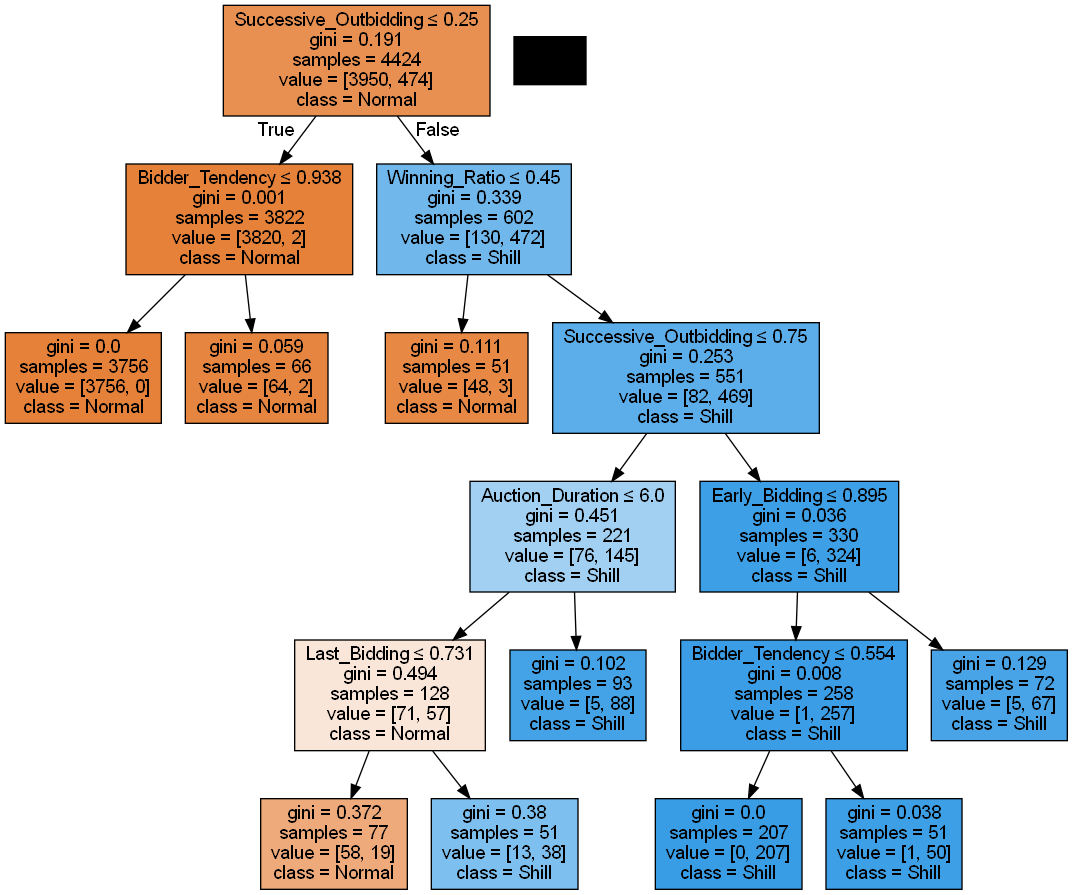

In [39]:
# plotting the tree
dot_data = StringIO()
export_graphviz(clf_gini, out_file=dot_data,  
                filled=True, rounded=False,
                special_characters=True,feature_names = feature_cols,class_names=['Normal','Shill'])


graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('shill.png')
Image(graph.create_png())